<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
### Type your code here
transactions = pd.read_csv('data/transactions.csv', nrows=1000000)
tr_types = pd.read_csv('data/tr_types.csv', sep = ';')
tr_mcc_codes = pd.read_csv('data/tr_mcc_codes.csv', sep = ";")
gender_train = pd.read_csv('data/gender_train.csv')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [3]:
### Type your code here
transactions = transactions.merge(gender_train, how = 'left', on = 'customer_id')
transactions.head(5)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1.0
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1.0
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1.0
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,1.0


In [4]:
transactions = transactions.merge(tr_types, how = 'inner', on = 'tr_type')
transactions.head(5)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ


In [5]:
transactions = transactions.merge(tr_mcc_codes, how = 'inner', on = 'mcc_code')
transactions.head(5)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."


In [6]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
...,...,...,...,...,...,...,...,...,...
999579,48819028,388 00:00:00,7993,1200,-8062.84,00000000,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр
999580,32478197,254 00:00:00,7993,1200,-5367.74,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр
999581,32478197,254 00:00:00,7993,1200,-5816.92,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр
999582,89619970,21 00:00:00,7993,1200,-67355.01,NaN,NaN,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [12]:
### Type your code here
table_waste_gender_0 = transactions[(transactions['amount'] < 0) & (transactions['gender'] == 0)].amount.mean()
table_waste_gender_0

-53376.91712219133

In [13]:
table_waste_gender_1 = transactions[(transactions['amount'] < 0) & (transactions['gender'] == 1)].amount.mean()
table_waste_gender_1

-86094.97204241599

In [16]:
dif = round(abs(table_waste_gender_0 - table_waste_gender_1), 2)
dif

32718.05

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [19]:
### Type your code here
transactions_2 = transactions.copy()
transactions_2['mcc_type+tr_type'] = transactions_2['mcc_code'].astype(str) + transactions_2['tr_type'].astype(str)
transactions_2[transactions_2.amount < 0]
transactions_2

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,mcc_type+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030
...,...,...,...,...,...,...,...,...,...,...
999579,48819028,388 00:00:00,7993,1200,-8062.84,00000000,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200
999580,32478197,254 00:00:00,7993,1200,-5367.74,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200
999581,32478197,254 00:00:00,7993,1200,-5816.92,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200
999582,89619970,21 00:00:00,7993,1200,-67355.01,NaN,NaN,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200


In [22]:
f = lambda x: x.tr_datetime.count() >= 10
gb = transactions_2.groupby('mcc_type+tr_type').filter(f)
gb = gb.groupby('mcc_type+tr_type').amount.agg([lambda x: np.var(x)])
gb = gb.rename(columns={'<lambda>':'var_'})
result = round(gb.var_.max() / gb.var_.min())
result

8655155

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [24]:
### Type your code here
table_inc = transactions[transactions.amount > 0]
gb = table_inc.groupby(['tr_type', 'gender']).amount.agg(max_income='max')
gb

max_income
tr_type gender            
1010    0.0       24839.83
        1.0       28803.87
1100    0.0     2097006.17
        1.0      163727.26
1110    0.0      393035.26
...                    ...
7074    1.0     2245915.77
7075    0.0        6737.75
        1.0      437953.58
8100    1.0       64682.37
8145    0.0      320145.86

[72 rows x 1 columns]

In [25]:
gb=gb.reset_index()
gb_gender_0 = gb[gb.gender==0.0]
gb_gender_0 = gb_gender_0.sort_values(by='max_income')
gb_gender_1 = gb[gb.gender==1.0]
gb_gender_1 = gb_gender_1.sort_values(by='max_income')

In [31]:
gb_gender_0 = pd.merge(gb_gender_0, tr_types, how='inner', on='tr_type')
gb_gender_0.head()

,tr_type,gender,max_income,tr_description
0,4051,0.0,1122.96,Плата за перевод на карту (с карты) через АТМ ...
1,4110,0.0,2245.92,Плата за получение наличных в АТМ. Россия
2,4210,0.0,2245.92,Плата за получение наличных в АТМ. Зарубеж.
3,2370,0.0,2335.75,Списание с карты на карту по операции <перевод...
4,4100,0.0,5041.86,Плата за получение наличных. Россия


In [32]:
gb_gender_1 = pd.merge(gb_gender_1, tr_types, on='tr_type', how='inner')
gb_gender_1.head()

,tr_type,gender,max_income,tr_description
0,4110,1.0,2245.92,Плата за получение наличных в АТМ. Россия
1,2020,1.0,2245.92,Выдача наличных через POS Сбербанка
2,1010,1.0,28803.87,Покупка. POS ТУ СБ РФ
3,8100,1.0,64682.37,Списание после проведения претензионной работы
4,6000,1.0,79280.83,Возврат покупки. ТУ СБ РФ


Ответ: 5

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [33]:
### Type your code here
data = transactions
data['day'] = transactions['tr_datetime'].str.split().apply(lambda x: x[0])
cc = data.groupby('day').nunique()['mcc_code']

In [34]:
results = data.merge(cc, left_on='day', right_index=True).groupby(['gender', 'mcc_code_x']).median()

In [35]:
flor_code = int(data[data['mcc_description'] == 'Флористика']['mcc_code'].unique())
results.loc[[(0,flor_code), (1,flor_code)]]

,,customer_id,tr_type,amount,mcc_code_y
gender,mcc_code_x,,,,
0.0,5992,64936619.0,1010.0,-12352.54,79.0
1.0,5992,28793526.0,1010.0,-19090.28,78.0


In [37]:
paper_code = int(data[data['mcc_description'].apply(lambda x : 'бумаги' in x.lower())]['mcc_code'].unique())
results.loc[[(0,paper_code), (1,paper_code)]]

,,customer_id,tr_type,amount,mcc_code_y
gender,mcc_code_x,,,,
0.0,6211,93741697.0,1200.0,-6737.75,80.0
1.0,6211,34039951.0,1100.0,-11229.58,79.0


In [39]:
bar_code = int(data[data['mcc_description'].apply(lambda x : 'бары' in x.lower())]['mcc_code'].unique())
results.loc[[(0,bar_code), (1,bar_code)]]

,,customer_id,tr_type,amount,mcc_code_y
gender,mcc_code_x,,,,
0.0,5813,49477207.0,1110.0,-9387.93,77.5
1.0,5813,43934664.0,1110.0,-12667.86,77.0


Ответ: 1,3,5

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [46]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [44]:
# Type your code here
amount_bucket = pd.qcut(data['amount'].apply(lambda x: x if x < 0 else None), 5,
labels=['Very High', 'High', 'Middle', 'Low', 'Very Low']
).cat.add_categories('Income')
amount_bucket = amount_bucket.fillna('Income')

In [45]:
hours = data['tr_datetime'].apply(lambda x: x.split()[1].split(':')[0])

In [47]:
pd_data = data
pd_data['amount_bucket'] = amount_bucket
pd_data['hours'] = hours

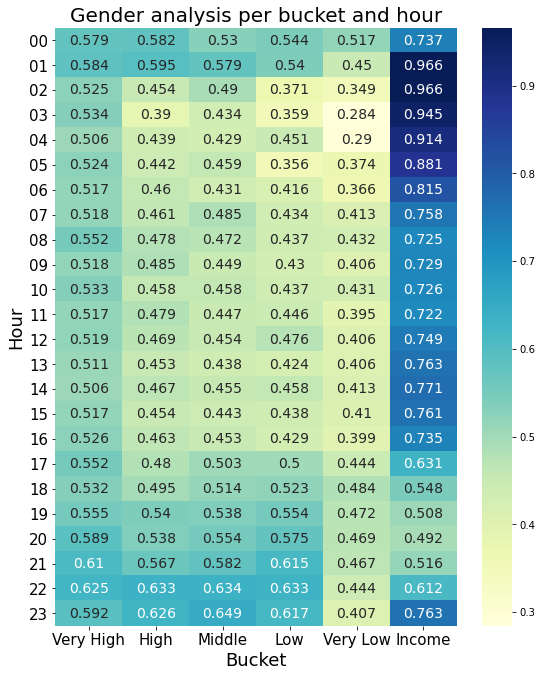

In [48]:
piv_table = pd_data.pivot_table('gender', index='hours', columns='amount_bucket')
plot_pivot_table(piv_table)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [49]:
# Type your code here
data['day'] = data['day'].astype(int)
new_data = data.groupby('mcc_code').count()
code = list(new_data[new_data['amount'] >60000].index)
av_amount = data[data['mcc_code'].apply(lambda x : x in code)].groupby(['day', 'mcc_code']).mean()['amount']
code

[4814, 4829, 5411, 6010, 6011]

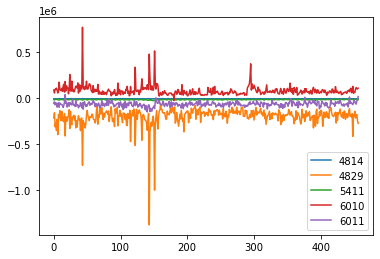

In [50]:
unstacked_av_amount = av_amount.unstack()
for c in unstacked_av_amount.columns:
    plt.plot(unstacked_av_amount.index ,unstacked_av_amount[c])
    plt.legend(unstacked_av_amount.columns)

In [51]:
transactions[transactions['mcc_code'] == 5411]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,mcc_type+tr_type,day,amount_bucket,hours
539191,52220754,4 15:04:60,5411,1010,-5695.64,NaN,1.0,Покупка. POS ТУ СБ РФ,"Бакалейные магазины, супермаркеты",54111010,4,Low,15
539192,52220754,7 18:16:08,5411,1010,-1414.93,NaN,1.0,Покупка. POS ТУ СБ РФ,"Бакалейные магазины, супермаркеты",54111010,7,Very Low,18
539193,52220754,24 18:15:06,5411,1010,-3791.11,NaN,1.0,Покупка. POS ТУ СБ РФ,"Бакалейные магазины, супермаркеты",54111010,24,Low,18
539194,52220754,25 16:51:30,5411,1010,-22064.10,NaN,1.0,Покупка. POS ТУ СБ РФ,"Бакалейные магазины, супермаркеты",54111010,25,High,16
539195,52220754,31 17:31:24,5411,1010,-7476.65,NaN,1.0,Покупка. POS ТУ СБ РФ,"Бакалейные магазины, супермаркеты",54111010,31,Middle,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683388,91073908,446 19:47:31,5411,1310,-3144.28,10003198,0.0,н/д,"Бакалейные магазины, супермаркеты",54111310,446,Low,19
683389,6808459,376 19:07:08,5411,1310,-7613.65,10337501,NaN,н/д,"Бакалейные магазины, супермаркеты",54111310,376,Middle,19
683390,73342030,428 15:18:45,5411,1310,-98326.19,10239046,1.0,н/д,"Бакалейные магазины, супермаркеты",54111310,428,Very High,15
683391,18654396,440 13:10:22,5411,6210,3897.56,931938,1.0,Возврат покупки.POS Зарубеж. ТУ,"Бакалейные магазины, супермаркеты",54116210,440,Income,13


Ответы: 1, 2, 4